In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
import math

In [2]:
import datashader as ds, datashader.transfer_functions as tf
import dask.dataframe as dd

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)

In [5]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)
#background = "black"
background=None

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

In [6]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [7]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH',]#'MIN', ]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [8]:
morder1 = morder[:-1]
mpalette1 = mpalette[:-1]

In [9]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [10]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [11]:
sns.color_palette('summer')

[(0.1411764705882353, 0.5705882352941176, 0.4),
 (0.28627450980392155, 0.6431372549019607, 0.4),
 (0.42745098039215684, 0.7137254901960784, 0.4),
 (0.5725490196078431, 0.7862745098039216, 0.4),
 (0.7137254901960784, 0.8568627450980393, 0.4),
 (0.8588235294117647, 0.9294117647058824, 0.4)]

In [12]:
sns.palettes.QUAL_PALETTES

['tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'Set1',
 'Set2',
 'Set3',
 'Accent',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Dark2',
 'deep',
 'deep6',
 'muted',
 'muted6',
 'pastel',
 'pastel6',
 'bright',
 'bright6',
 'dark',
 'dark6',
 'colorblind',
 'colorblind6']

In [13]:
ccnorder = ['Bp', 'Np','Bh',  'Nh', 'DIN','DON',  'RDON', ]
ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DINCOLOR, DONCOLOR, RDONCOLOR, ]

#Hex Codes: #262842, #293961, #2C497F, #8897BD, #E3E4FA
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
#Hex Codes: #5E1525, #C74F29, #E99E46, #B6C38D, #828144
ccnpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#262842', '#2C497F', '#8897BD']
#ccnpalette = ['#828144', '#B6C38D', '#E99E46', '#E7BB96', '#262842', '#2C497F', '#8897BD']
cccorder = ['Bp[C]', 'Cp','Bh[C]',  'Ch', 'DIC','DOC',  'RDOC', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DICCOLOR, DOCCOLOR, RDOCCOLOR, ]
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
cccpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#DF5F35', '#EF9E84', '#ffd8d1']

sns.color_palette(cccpalette)

[(0.1843137254901961, 0.403921568627451, 0.3333333333333333),
 (0.596078431372549, 0.6509803921568628, 0.6039215686274509),
 (0.49019607843137253, 0.3607843137254902, 0.32941176470588235),
 (0.9058823529411765, 0.7333333333333333, 0.5882352941176471),
 (0.8745098039215686, 0.37254901960784315, 0.20784313725490197),
 (0.9372549019607843, 0.6196078431372549, 0.5176470588235295),
 (1.0, 0.8470588235294118, 0.8196078431372549)]

In [14]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [15]:
refdf = pd.read_excel('../ML_model/reference_final.xlsx')

In [16]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = '../results'
dpath = '../results/final/ponly'

In [17]:
fnames_df = [
    'monte_ponly_clean_df.csv.gz',
]

In [18]:
sim_df1 = pd.read_csv(os.path.join(dpath,'monte_ponly_clean_df.csv.gz',))

In [19]:
sim_df1[['id', 'media', 'which', 'model', 'hash']] =     sim_df1.run_id.str.rsplit('_', n=4, expand=True)

In [20]:
sim_df1['VPRO_nocluster'] = sim_df1.idx.str.replace('monte_ponly_','vpro_', regex=False)
sim_df1['VPRO_nocluster'] = sim_df1['VPRO_nocluster'].str.replace('_monte__','_', regex=False)
for m in morder:
    sim_df1['VPRO_nocluster'] = sim_df1['VPRO_nocluster'].str.replace(f'_{m}_','_', regex=False)


In [21]:
vpro_df = pd.read_csv('../ML_model/versatile_vpros.csv')

In [22]:
vpro_df['VPRO_nocluster'] =  vpro_df.VPRO.str.replace(r'_C\d$', '', regex=True)

In [23]:
vpro_df = vpro_df.loc[vpro_df.VPRO_nocluster.isin(sim_df1.VPRO_nocluster)]

In [24]:
sim_df1['isVPRO'] = 'Not VPRO'
sim_df1.loc[sim_df1.VPRO_nocluster.isin(vpro_df.VPRO_nocluster), 'isVPRO'] = 'VPRO'


In [25]:
all_ids = sim_df1.loc[sim_df1.media.isin(['lowN'])][['run_id', 'isVPRO']].value_counts().reset_index()
all_ids

,run_id,isVPRO,count
0,monte_ponly_ROS_9_monte__9_lowN_ponly_ROS_h-20...,Not VPRO,74
1,monte_ponly_EXOENZYME_100_monte__0_lowN_ponly_...,Not VPRO,74
2,monte_ponly_EXOENZYME_100_monte__10_lowN_ponly...,Not VPRO,74
3,monte_ponly_EXOENZYME_100_monte__11_lowN_ponly...,Not VPRO,74
4,monte_ponly_EXOENZYME_100_monte__12_lowN_ponly...,Not VPRO,74
...,...,...,...
49861,monte_ponly_EXOENZYME_100_monte__21_lowN_ponly...,Not VPRO,74
49862,monte_ponly_EXOENZYME_100_monte__22_lowN_ponly...,Not VPRO,74
49863,monte_ponly_EXOENZYME_100_monte__23_lowN_ponly...,Not VPRO,74
49864,monte_ponly_EXOENZYME_100_monte__24_lowN_ponly...,Not VPRO,74


In [26]:
sample_ids = all_ids.groupby('isVPRO').run_id.sample(300, replace=True)

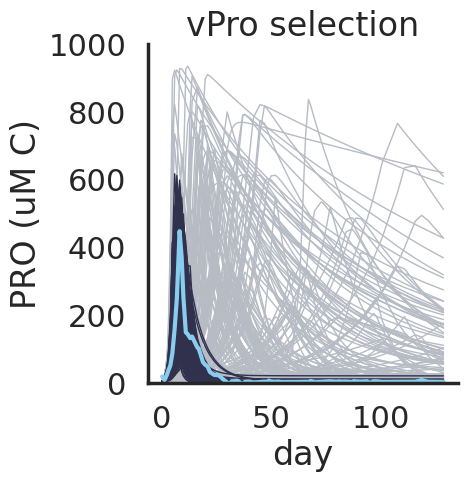

In [45]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=sim_df1.loc[sim_df1.run_id.isin(sample_ids)], #  head(5000), #.loc[df.run_id.isin(runids)],
    x='day',
    y='Bptotal[C]',
    hue='isVPRO', #hue_order=reversed(gorder),
    hue_order=['Not VPRO', 'VPRO'], palette=['#B6BBC4', '#31304D'],
    kind='line', lw=1,
    estimator=None, units='run_id', 
    #palette=reversed(gpalette),
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
sns.lineplot(
    data=refdf.loc[refdf.Group.isin(['Axenic'])],
    x='day',
    y='ref_Bp[C]',
    #lw=1, 
    errorbar=None,
    color=gpalette[-2],
    legend=False,
    
  
)
g.set( title='vPro selection')

g.set(ylabel='PRO (uM C)')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set(ylim=(0, 1000))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

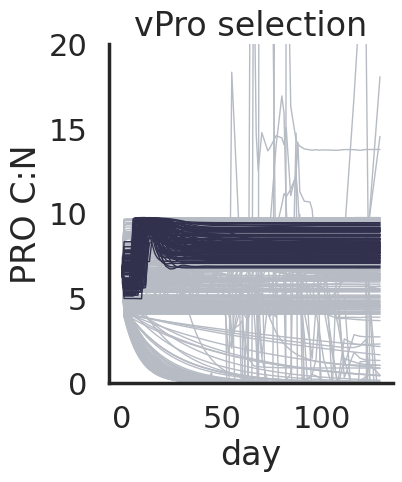

In [37]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=sim_df1.loc[sim_df1.run_id.isin(sample_ids)], #  head(5000), #.loc[df.run_id.isin(runids)],
    x='day',
    y='QCp',
    hue='isVPRO', #hue_order=reversed(gorder),
    hue_order=['Not VPRO', 'VPRO'], palette=['#B6BBC4', '#31304D'],
    kind='line', lw=1,
    estimator=None, units='run_id', 
    #palette=reversed(gpalette),
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )

g.set(ylabel='PRO C:N', title='vPro selection')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set(ylim=(0, 20))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

In [36]:
sim_df1['store/total N'] = sim_df1['Np'].div(sim_df1['Bptotal[N]'])
sim_df1['store/total C'] = sim_df1['Cp'].div(sim_df1['Bptotal[C]'])


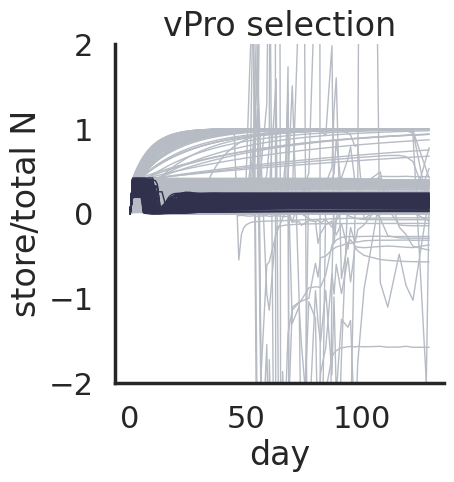

In [43]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=sim_df1.loc[sim_df1.run_id.isin(sample_ids)], #  head(5000), #.loc[df.run_id.isin(runids)],
    x='day',
    y='store/total N',
    hue='isVPRO', #hue_order=reversed(gorder),
    hue_order=['Not VPRO', 'VPRO'], palette=['#B6BBC4', '#31304D'],
    kind='line', lw=1,
    estimator=None, units='run_id', 
    #palette=reversed(gpalette),
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}')

g.set( title='vPro selection')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set(ylim=(-2, 2))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

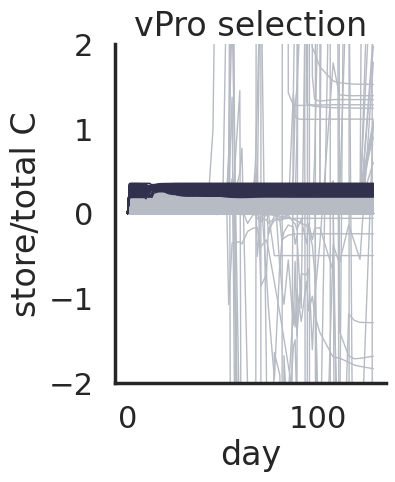

In [44]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=sim_df1.loc[sim_df1.run_id.isin(sample_ids)], #  head(5000), #.loc[df.run_id.isin(runids)],
    x='day',
    y='store/total C',
    hue='isVPRO', #hue_order=reversed(gorder),
    hue_order=['Not VPRO', 'VPRO'], palette=['#B6BBC4', '#31304D'],
    kind='line', lw=1,
    estimator=None, units='run_id', 
    #palette=reversed(gpalette),
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}')

g.set( title='vPro selection')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set(ylim=(-2, 2))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()